In [1]:
from numerapi import NumerAPI

In [7]:
napi = NumerAPI()
DATA_VERSION = 'v5.0'

In [6]:
for f in napi.list_datasets():
    file_type = f.split('.')[-1]
    if file_type == 'json' or file_type =='parquet':
        napi.download_dataset(f, f'../data/{f}')

2024-12-10 16:19:08,649 INFO numerapi.utils: starting download
../data/v5.0/features.json: 291kB [00:00, 1.44MB/s]                        
2024-12-10 16:19:09,329 INFO numerapi.utils: starting download
../data/v5.0/live.parquet: 7.88MB [00:00, 13.2MB/s]                        
2024-12-10 16:19:10,491 INFO numerapi.utils: starting download
../data/v5.0/live_benchmark_models.parquet: 283kB [00:00, 1.22MB/s]        
2024-12-10 16:19:11,360 INFO numerapi.utils: starting download
../data/v5.0/live_example_preds.parquet: 162kB [00:00, 1.17MB/s]           
2024-12-10 16:19:12,055 INFO numerapi.utils: starting download
../data/v5.0/meta_model.parquet: 1.20MB [00:00, 2.98MB/s]                  
2024-12-10 16:19:13,015 INFO numerapi.utils: starting download
../data/v5.0/train.parquet: 2.37GB [01:49, 21.6MB/s]                       
2024-12-10 16:21:03,510 INFO numerapi.utils: starting download
../data/v5.0/train_benchmark_models.parquet: 81.7MB [00:03, 24.8MB/s]      
2024-12-10 16:21:07,793 INF

In [22]:
import json

feature_metadata = json.load(open(f'../data/{DATA_VERSION}/features.json'))
feature_set = feature_metadata['feature_sets']['small']

In [23]:
import pandas as pd

train = pd.read_parquet(
    f'../data/{DATA_VERSION}/train.parquet',
    columns=['era', 'target'] + feature_set
)

In [24]:
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html
import lightgbm as lgb

# https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
model = lgb.LGBMRegressor(
  n_estimators=2000,
  learning_rate=0.01,
  max_depth=5,
  num_leaves=2**5-1,
  colsample_bytree=0.1
)
# We've found the following "deep" parameters perform much better, but they require much more CPU and RAM
# model = lgb.LGBMRegressor(
#     n_estimators=30_000,
#     learning_rate=0.001,
#     max_depth=10,
#     num_leaves=2**10,
#     colsample_bytree=0.1
#     min_data_in_leaf=10000,
# )

# This will take a few minutes 🍵
model.fit(
  train[feature_set],
  train["target"]
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 2746270, number of used features: 42
[LightGBM] [Info] Start training from score 0.500027


/Users/paullin/Documents/dev/numerai/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMRegressor(colsample_bytree=0.1, learning_rate=0.01, max_depth=5,
              n_estimators=2000)

In [32]:
validation = pd.read_parquet(
    f'../data/{DATA_VERSION}/validation.parquet',
    columns=['era', 'data_type', 'target'] + feature_set
)

validation = validation[validation['data_type'] == 'validation']
del validation['data_type']

In [33]:
validation = validation[validation['era'].isin(validation['era'].unique()[::4])]

In [34]:
validation

,era,target,feature_antistrophic_striate_conscriptionist,feature_bicameral_showery_wallaba,feature_bridal_fingered_pensioner,feature_collectivist_flaxen_gueux,feature_concurring_fabled_adapter,feature_crosscut_whilom_ataxy,feature_departmental_inimitable_sentencer,feature_dialectal_homely_cambodia,...,feature_tridactyl_immoral_snorting,feature_trimeter_soggy_greatest,feature_unanalyzable_excusable_whirlwind,feature_unbreakable_constraining_hegelianism,feature_unformed_bent_smatch,feature_unministerial_unextenuated_teleostean,feature_unmodish_zymogenic_rousing,feature_unsystematized_subcardinal_malaysia,feature_willful_sere_chronobiology,feature_zoological_peristomial_scute
id,,,,,,,,,,,,,,,,,,,,,
n000101811a8a843,0575,0.75,0,2,1,2,2,1,1,2,...,1,2,3,0,2,2,1,3,2,0
n001e1318d5072ac,0575,0.00,1,1,3,2,1,3,3,4,...,2,4,3,2,2,3,1,1,0,1
n002a9c5ab785cbb,0575,0.50,1,4,3,2,4,2,1,0,...,1,0,1,4,0,4,1,1,1,0
n002ccf6d0e8c5ad,0575,0.00,0,1,0,3,3,0,0,3,...,4,0,0,0,0,0,4,3,4,0
n0041544c345c91d,0575,0.50,0,3,4,2,2,3,1,2,...,4,3,2,2,3,2,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffcfe54de4ce8d6,1139,0.75,4,0,3,4,4,2,4,1,...,1,4,4,1,4,1,0,4,1,4
nffdddf405f2c33d,1139,0.25,2,0,0,4,4,3,0,3,...,1,0,0,3,0,4,3,1,4,1
nffe751e00183f5f,1139,0.50,0,4,4,4,4,2,4,0,...,1,4,4,0,4,1,0,2,3,3


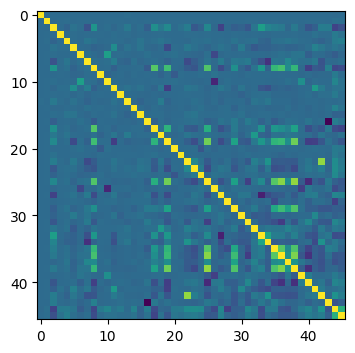

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.imshow(validation.corr())
# validation.corr()

In [35]:
validation['prediction'] = model.predict(validation[feature_set])

In [37]:
validation[['era', 'target', 'prediction']]

,era,target,prediction
id,,,
n000101811a8a843,0575,0.75,0.493198
n001e1318d5072ac,0575,0.00,0.502537
n002a9c5ab785cbb,0575,0.50,0.497136
n002ccf6d0e8c5ad,0575,0.00,0.513936
n0041544c345c91d,0575,0.50,0.508633
...,...,...,...
nffcfe54de4ce8d6,1139,0.75,0.489385
nffdddf405f2c33d,1139,0.25,0.517458
nffe751e00183f5f,1139,0.50,0.507742


In [39]:
from numerai_tools.scoring import numerai_corr, correlation_contribution

# Download and join in the meta_model for the validation eras
# napi.download_dataset(f"v4.3/meta_model.parquet", round_num=842)
validation["meta_model"] = pd.read_parquet(
    f"../data/{DATA_VERSION}/meta_model.parquet"
)["numerai_meta_model"]

In [42]:
validation[['era', 'target', 'prediction', 'meta_model']]

,era,target,prediction,meta_model
id,,,,
n000101811a8a843,0575,0.75,0.493198,NaN
n001e1318d5072ac,0575,0.00,0.502537,NaN
n002a9c5ab785cbb,0575,0.50,0.497136,NaN
n002ccf6d0e8c5ad,0575,0.00,0.513936,NaN
n0041544c345c91d,0575,0.50,0.508633,NaN
...,...,...,...,...
nffcfe54de4ce8d6,1139,0.75,0.489385,0.678100
nffdddf405f2c33d,1139,0.25,0.517458,0.692265
nffe751e00183f5f,1139,0.50,0.507742,0.690514


In [45]:
per_era_corr = validation.groupby("era").apply(
    lambda x: numerai_corr(x[["prediction"]].dropna(), x["target"].dropna())
)
per_era_corr

/var/folders/mg/mns6xbvd6ml1gn38m1g7ylrm0000gn/T/ipykernel_73904/2913589435.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  per_era_corr = validation.groupby("era").apply(


,prediction
era,
0575,0.060632
0579,0.004614
0583,0.016219
0587,0.031968
0591,0.011707
...,...
1123,0.011321
1127,0.002173
1131,0.020500
